In [2]:
from mendeleev import element
import pandas as pd
import numpy as np
import pymatgen as mg
import seaborn as sns
from pymatgen.ext.matproj import MPRester
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df_filtered_finished_data = pd.read_csv("BiLayer_Data.csv") 
df_filtered_finished_data.head()

,Unnamed: 0,Formula,Stacking,name,data,magmom_unitcell_x,magmom_unitcell_y,magmom_unitcell_z,magmom_total,LOOP+,...,Transition_Element,Halides,total_electron_count,total_nvalence,total_heat_of_formation,total_unpaired_electrons,total_electron_affinity,total_en_ghosh,total_en_pauling,total_dipole_polarizability
0,0,Ir4Cl12,ABstacking,spin,"{'LOOP+': [444.2358, 103.2472, 147.5554, 183.8...",0.000,NaN,NaN,0.000,"[444.2358, 103.2472, 147.5554, 183.8595]",...,['Ir'],Cl,512.0,120.0,4131.624,24.0,49.607900,4.169876,46.72,391.2
1,1,Zr2Ti2I12,ABstacking,initial,"{'LOOP+': [1593.245, 326.0933, 396.8862, 308.7...",2.996,NaN,NaN,2.996,"[1593.245, 326.0933, 396.8862, 308.7425, 377.3...",...,"['Ti', 'Zr']",I,760.0,100.0,3447.084,20.0,37.718442,3.130716,37.66,818.8
2,2,Ti4Br12,ABstacking,initial,"{'LOOP+': [696.6812, 209.2252, 150.3886, 121.2...",6.553,NaN,NaN,6.553,"[696.6812, 209.2252, 150.3886, 121.282, 220.83...",...,['Ti'],Br,508.0,100.0,3234.200,20.0,40.679058,3.388548,41.68,652.0
3,3,Ni2Ir2Cl12,ABstacking,initial,"{'LOOP+': [609.0947, 129.4953, 82.5947, 64.488...",3.823,NaN,NaN,3.823,"[609.0947, 129.4953, 82.5947, 64.4883, 65.5359...",...,"['Ni', 'Ir']",Cl,414.0,122.0,3653.824,22.0,48.792300,3.962170,46.14,381.2
4,4,Mo2Ir2Br12,ABstacking,afm_so,"{'LOOP+': [2381.2066, 914.4853, 588.6001, 501....",0.000,0.002,0.0,0.002,"[2381.2066, 914.4853, 588.6001, 501.4889, 904....",...,"['Mo', 'Ir']",Br,658.0,114.0,3998.160,30.0,44.986658,3.659748,44.24,534.0


In [51]:
from statistics import mean, median

formation_energy = df_filtered_finished_data['formation_energy']
#formation_energy_np = formation_energy.to_numpy(),linspace()

print(df_filtered_finished_data['formation_energy'].describe())


count    176.000000
mean     -70.034593
std       13.708047
min     -104.279224
25%      -79.833499
50%      -68.288990
75%      -60.062864
max      -43.234708
Name: formation_energy, dtype: float64


Text(0, 0.5, 'Frequency')

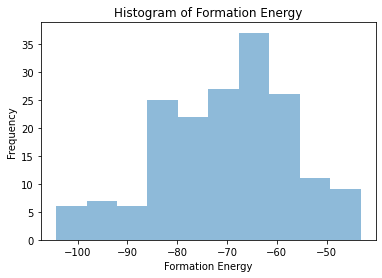

In [52]:
plt.hist(df_filtered_finished_data['formation_energy'],alpha=0.5)
plt.title('Histogram of Formation Energy')
plt.xlabel('Formation Energy')
plt.ylabel('Frequency')
# If Formation Energy is more negative it is more stable

In [54]:
# check for transition elements and halides in the formula

transition_elements_dict = {'Ti': 'titanium', 'V': 'vanadium','Cr': 'chromium','Mn': 'manganese','Fe': 'iron',
           'Co': 'cobalt','Ni': 'nickel','Cu': 'copper','Zr': 'zirconium','Nb': 'niobium',
           'Mo': 'molybdenum','Tc': 'technetium','Ru': 'ruthenium','Rh': 'rhodium','Pd': 'palladium',
           'Ag': 'silver','Hf': 'hafnium','Ta': 'tantalum','W': 'tungsten','Re': 'rhenium',
           'Os': 'osmium','Ir': 'iridium','Pt': 'platinum','Au': 'gold', 'Sc': 'scandium',
           'Zn': 'zinc','Y': 'yttrium','Cd': 'cadmium','Hg': 'mercury','Rf': 'rutherfordium',
           'Db': 'dubnium','Sg': 'seaborgium','Bh': 'bohrium','Hs': 'hassium','Mt': 'meitnerium',
           'Uun':'ununnilium','Uuu': 'unununium','Uub': 'unubium'}
transition_metal_symbol = list(transition_elements_dict.keys())
count = 0
for symbol in transition_metal_symbol:
    count = count +1

def classify_based_on_transition_metal( formula ):
   
   list_of_transition_metal = []
   for symbol in transition_metal_symbol:
    if(symbol in formula):
        list_of_transition_metal.append(symbol)
   return list_of_transition_metal



def has_key_in(string):
  return any(k in string for k in transition_elements_dict)

halides_dict = {'F': 'Fluoride', 'Cl': 'Chloride','Br': 'Bromide','I': 'Iodide'}
halide_symbol = list(halides_dict.keys())


def classify_based_on_halides( formula ):
   
   halides = ''
   for symbol in halide_symbol:
    if(symbol in formula):
        halides = symbol
   return halides


Count of transition element in dictionary ( x axis)
38
Presence of Transition Element in the data set :
{'Ti': 80, 'V': 0, 'Cr': 10, 'Mn': 0, 'Fe': 10, 'Co': 0, 'Ni': 17, 'Cu': 0, 'Zr': 14, 'Nb': 0, 'Mo': 12, 'Tc': 0, 'Ru': 18, 'Rh': 0, 'Pd': 14, 'Ag': 0, 'Hf': 0, 'Ta': 0, 'W': 0, 'Re': 0, 'Os': 0, 'Ir': 97, 'Pt': 0, 'Au': 17, 'Sc': 0, 'Zn': 15, 'Y': 0, 'Cd': 28, 'Hg': 0, 'Rf': 0, 'Db': 0, 'Sg': 0, 'Bh': 0, 'Hs': 0, 'Mt': 0, 'Uun': 0, 'Uuu': 0, 'Uub': 0}


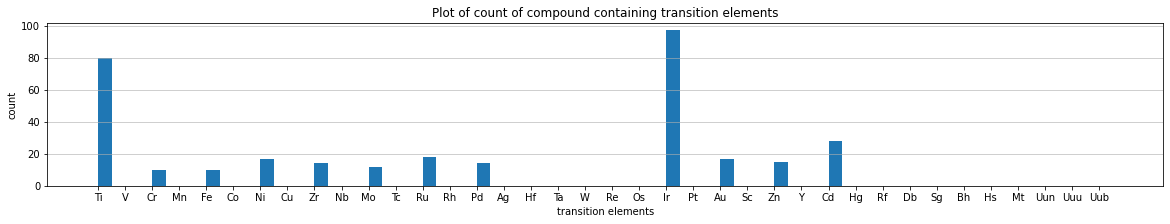

In [55]:
count = 0
d = { }

for ele in transition_metal_symbol:
    count = count +1
print("Count of transition element in dictionary ( x axis)")    
print(count)
#df_filtered_finished_data.Transition_Element

list_of_list_of_transition_metal = np.array(df_filtered_finished_data.Transition_Element)


#print(list_of_normalized_moment)
#print(list_of_list_of_transition_metal)
#transition_metal_symbol = ['Fe']

for ele in transition_metal_symbol:
    count = 0
    for each_list in df_filtered_finished_data.Transition_Element:
        if ele in each_list:
            count = count +1 
            #print(df_heatmap.normalized_moment)
    d[ele] = count
print("Presence of Transition Element in the data set :")
print(d)

plt.figure(figsize=(20, 3))  # width:20, height:3
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)

plt.bar(range(len(d)), list(d.values()), align='edge', width=0.5)
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Plot of count of compound containing transition elements')
plt.xlabel('transition elements')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.show()

Count of Halides in dictionary ( x axis)
4
Presence of Halides in the data set :
{'F': 0, 'Cl': 66, 'Br': 55, 'I': 55}


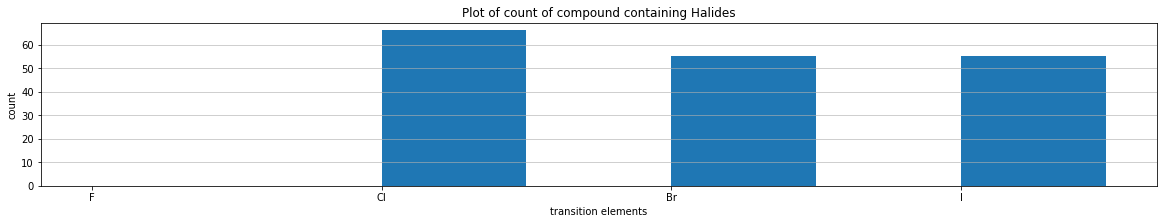

In [56]:
count = 0
d = { }

for ele in halide_symbol:
    count = count +1
print("Count of Halides in dictionary ( x axis)")    
print(count)
#df_filtered_finished_data.Transition_Element

list_of_list_of_halides = np.array(df_filtered_finished_data.Halides)

for ele in halide_symbol:
    count = 0
    for each_list in df_filtered_finished_data.Halides:
        if ele in each_list:
            count = count +1 
            #print(df_heatmap.normalized_moment)
    d[ele] = count
print("Presence of Halides in the data set :")
print(d)

plt.figure(figsize=(20, 3))  # width:20, height:3
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)

plt.bar(range(len(d)), list(d.values()), align='edge', width=0.5)
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Plot of count of compound containing Halides')
plt.xlabel('transition elements')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.show()

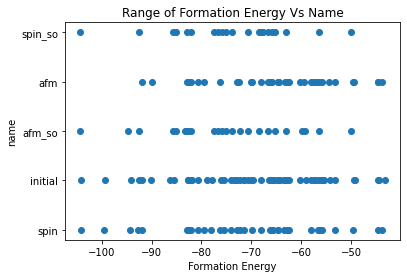

In [57]:
#plots to show the range of formation energy for different names

fig, ax = plt.subplots()

ax.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['name'])
plt.title('Range of Formation Energy Vs Name')
plt.xlabel('Formation Energy')
plt.ylabel('name')

plt.show()

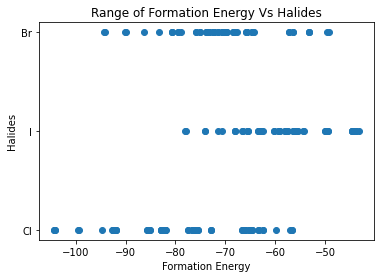

In [58]:

#plots to show the range of formation energy for different hallides
fig, ax2 = plt.subplots()

ax2.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['Halides'])

plt.title('Range of Formation Energy Vs Halides')
plt.xlabel('Formation Energy')
plt.ylabel('Halides')

plt.show()

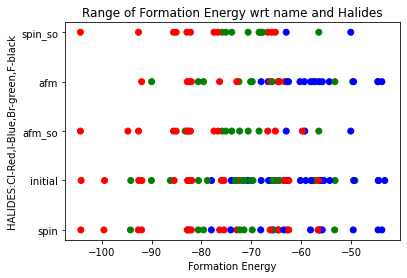

In [59]:
#plots to show the range of formation energy for different names
#the colors mark the three hallides available

fig, ax3 = plt.subplots()
colors = {"Cl":"red", "I":"blue", "Br":"green", "F":"black"}

ax3.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['name'], c=df_filtered_finished_data['Halides'].apply(lambda x: colors[x]))

plt.title('Range of Formation Energy wrt name and Halides')
plt.xlabel('Formation Energy')
plt.ylabel('HALIDES:Cl-Red,I-Blue,Br-green,F-black')

plt.show()

       name Halides  formation_energy_mean
0       afm      Br             -68.133138
1       afm      Cl             -73.984736
2       afm       I             -56.289386
3    afm_so      Br             -72.008734
4    afm_so      Cl             -81.230002
5    afm_so       I             -57.451103
6   initial      Br             -71.092832
7   initial      Cl             -78.878978
8   initial       I             -60.170182
9      spin      Br             -72.417269
10     spin      Cl             -79.543593
11     spin       I             -59.739304
12  spin_so      Br             -69.531421
13  spin_so      Cl             -80.426588
14  spin_so       I             -56.533816


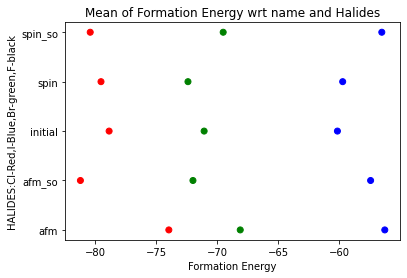

In [60]:
grouped_multiple = df_filtered_finished_data.groupby(['name', 'Halides']).agg({'formation_energy': ['mean']})
grouped_multiple.columns = ['formation_energy_mean']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

fig, ax4 = plt.subplots()
colors = {"Cl":"red", "I":"blue", "Br":"green", "F":"black"}

ax4.scatter(grouped_multiple['formation_energy_mean'], grouped_multiple['name'], c=grouped_multiple['Halides'].apply(lambda x: colors[x]))
plt.title('Mean of Formation Energy wrt name and Halides')
plt.xlabel('Formation Energy')
plt.ylabel('HALIDES:Cl-Red,I-Blue,Br-green,F-black')
plt.show()

In [61]:
grouped_multiple = df_filtered_finished_data.groupby(['name', 'Halides'])['formation_energy'].count()
#grouped_multiple.columns = ['formation_energy_mean']
grouped_multiple = grouped_multiple.reset_index()

print(grouped_multiple)
# Made a BiPartite graph for dynamic visualization

       name Halides  formation_energy
0       afm      Br                12
1       afm      Cl                10
2       afm       I                15
3    afm_so      Br                 8
4    afm_so      Cl                13
5    afm_so       I                 3
6   initial      Br                18
7   initial      Cl                17
8   initial       I                22
9      spin      Br                 9
10     spin      Cl                15
11     spin       I                13
12  spin_so      Br                 8
13  spin_so      Cl                11
14  spin_so       I                 2


In [62]:
# corelation between formation energy and descriptor
# more correlated if close to 1
print(df_filtered_finished_data.columns)
df_energy_heatmap = df_filtered_finished_data[['relaxed_Energy', 'sum_individual_energy', 'formation_energy',
                                              'total_electron_count', 'total_nvalence', 'total_heat_of_formation',
                                           'total_unpaired_electrons', 'total_electron_affinity', 'total_en_ghosh',
                                           'total_en_pauling', 'total_dipole_polarizability']].copy()

Index(['Unnamed: 0', 'Formula', 'Stacking', 'name', 'data',
       'magmom_unitcell_x', 'magmom_unitcell_y', 'magmom_unitcell_z',
       'magmom_total', 'LOOP+', 'NIONS', 'NKDIM', 'NBANDS', 'energy', 'stress',
       'retry_count', 'lattice_vecs', 'total charge', 'magnetization',
       'position_force', 'volume of cell', 'relaxed_Energy',
       'sum_individual_energy', 'elements_present', 'composition',
       'formation_energy', 'Transition_Element', 'Halides',
       'total_electron_count', 'total_nvalence', 'total_heat_of_formation',
       'total_unpaired_electrons', 'total_electron_affinity', 'total_en_ghosh',
       'total_en_pauling', 'total_dipole_polarizability'],
      dtype='object')


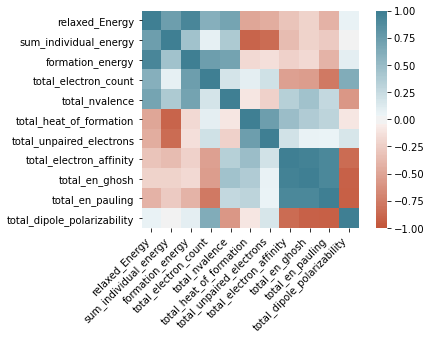

In [63]:
corr = df_energy_heatmap.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

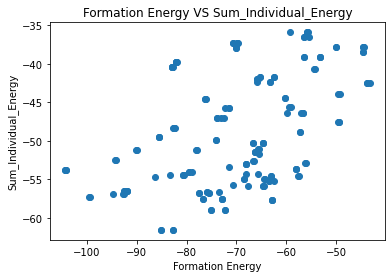

In [64]:
plt.subplot()
plt.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['sum_individual_energy'])
plt.title('Formation Energy VS Sum_Individual_Energy')
plt.xlabel('Formation Energy')
plt.ylabel('Sum_Individual_Energy')
plt.show()

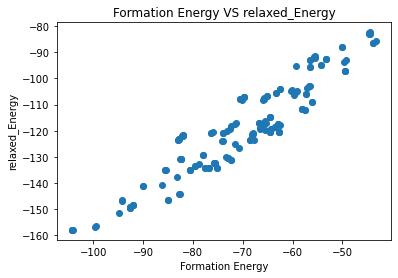

In [65]:
plt.subplot()
plt.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['relaxed_Energy'])
plt.title('Formation Energy VS relaxed_Energy')
plt.xlabel('Formation Energy')
plt.ylabel('relaxed_Energy')
plt.show()

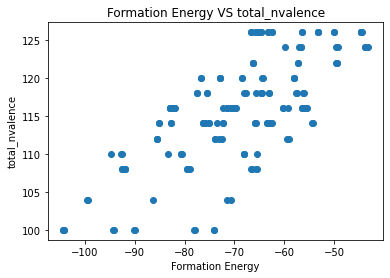

In [66]:
plt.subplot()
plt.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['total_nvalence'])
plt.title('Formation Energy VS total_nvalence')
plt.xlabel('Formation Energy')
plt.ylabel('total_nvalence')
plt.show()

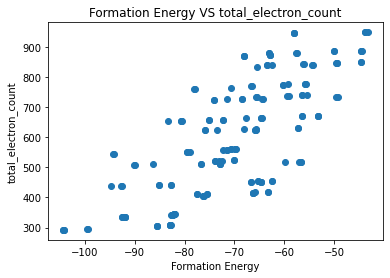

In [67]:
plt.subplot()
plt.scatter(df_filtered_finished_data['formation_energy'], df_filtered_finished_data['total_electron_count'])
plt.title('Formation Energy VS total_electron_count')
plt.xlabel('Formation Energy')
plt.ylabel('total_electron_count')
plt.show()

In [68]:
#print(df_filtered_finished_data.iloc[2]['magnetization'])

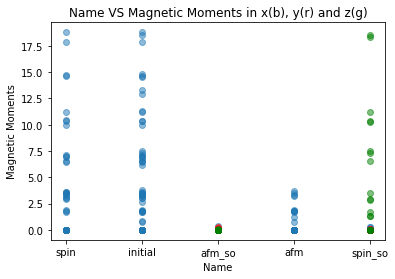

In [9]:
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_unitcell_x, alpha =0.5)
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_unitcell_y, color='r',alpha =0.5)
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_unitcell_z, color = 'g', alpha = 0.5)
plt.title('Name VS Magnetic Moments in x(b), y(r) and z(g)')
plt.xlabel('Name')
plt.ylabel('Magnetic Moments')
plt.show()


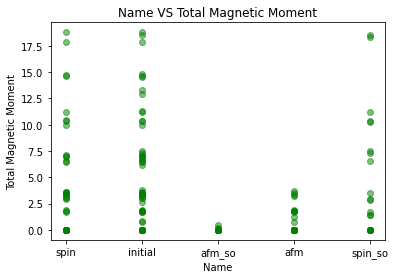

In [72]:
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_total, color = 'g', alpha = 0.5)
plt.title('Name VS Total Magnetic Moment')
plt.xlabel('Name')
plt.ylabel('Total Magnetic Moment')
plt.show()

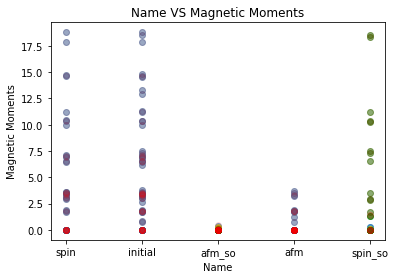

In [79]:
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_unitcell_x, alpha =0.5)
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_unitcell_y, color='y',alpha =0.5)
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_unitcell_z, color = 'g', alpha = 0.5)
plt.scatter(df_filtered_finished_data.name, df_filtered_finished_data.magmom_total, color = 'r', alpha = 0.1)
plt.title('Name VS Magnetic Moments')
plt.xlabel('Name')
plt.ylabel('Magnetic Moments')
plt.show()

# red and blue makes purple -- so all non spin over coupling has same x and total 
# green and red makes yellow  -- so both spin over coupling has max contribution in total from z

In [172]:
def create_dict_of_elements_and_formation_energy(df):
    # form a dictionary as key = Formula and value = [type_with_lowest_formation_energy, lowest_formation_energy , hasInitial, hasFMso, has AFMso]
    rownum = len(df)
    dict_of_element_and_lowest_formation_energy= {}
    
    for i in range(rownum) :
        Formula = df.iloc[i]['Formula']
        name = df.iloc[i]['name']
        formation_energy = df.iloc[i]['formation_energy']
        
        #print(Formula + " " + name + " " + str(formation_energy))
        
        if name == 'afm_so':
            isafm_so = True
        else :
            isafm_so = False
            
        if name == 'spin_so':
            isfm_so = True
        else :
            isfm_so = False
            
        if name == 'initial':
            isinitial = True
        else :
            isinitial = False
 
        list_energy_type = []
        if isinitial or isfm_so or isafm_so :
            if Formula in dict_of_element_and_lowest_formation_energy.keys():
                list_energy_type = dict_of_element_and_lowest_formation_energy.get(Formula)
                # check if the previous formation energy is greater than the current one, if yes replace
                prev_formation_energy = list_energy_type[1]

                if(prev_formation_energy > formation_energy):

                    list_energy_type[0] = name
                    list_energy_type[1] = formation_energy 
                    # update the dictionary with new value 
                    dict_of_element_and_lowest_formation_energy[Formula] = list_energy_type
            else :
                # insert new entry in dictionary
                 # list contains type, formation_energy , hasInitial, hasFMso, has AFMso
                list_energy_type = [name, formation_energy, False, False, False]
                dict_of_element_and_lowest_formation_energy.update({Formula: list_energy_type})


            if isinitial :
                list_energy_type[2] = True

            elif isfm_so :
                list_energy_type[3] = True

            elif isafm_so :
                list_energy_type[4] = True


            dict_of_element_and_lowest_formation_energy[Formula] = list_energy_type
         
        #formation_energy.append(formation_energy_val)       
    
    #df['formation_energy'] = formation_energy
    #print(dict_of_element_and_lowest_formation_energy)
    
    return dict_of_element_and_lowest_formation_energy

In [173]:
def create_dict_of_elements_and_formation_energy_without_initial(df):
    # form a dictionary as key = Formula and value = [type_with_lowest_formation_energy, lowest_formation_energy , hasInitial, hasFMso, has AFMso]
    rownum = len(df)
    dict_of_element_and_lowest_formation_energy_without_initial= {}
    
    for i in range(rownum) :
        Formula = df.iloc[i]['Formula']
        name = df.iloc[i]['name']
        formation_energy = df.iloc[i]['formation_energy']
        
        #print(Formula + " " + name + " " + str(formation_energy))
        
        if name == 'afm_so':
            isafm_so = True
        else :
            isafm_so = False
            
        if name == 'spin_so':
            isfm_so = True
        else :
            isfm_so = False
            
        if name == 'initial':
            isinitial = True
        else :
            isinitial = False
 
        list_energy_type = []
        if isfm_so or isafm_so :
            if Formula in dict_of_element_and_lowest_formation_energy_without_initial.keys():
                list_energy_type = dict_of_element_and_lowest_formation_energy_without_initial.get(Formula)
                # check if the previous formation energy is greater than the current one, if yes replace
                prev_formation_energy = list_energy_type[1]

                if(prev_formation_energy > formation_energy):

                    list_energy_type[0] = name
                    list_energy_type[1] = formation_energy 
                    # update the dictionary with new value 
                    dict_of_element_and_lowest_formation_energy_without_initial[Formula] = list_energy_type
            else :
                # insert new entry in dictionary
                 # list contains type, formation_energy , hasInitial, hasFMso, has AFMso
                list_energy_type = [name, formation_energy, False, False, False]
                dict_of_element_and_lowest_formation_energy_without_initial.update({Formula: list_energy_type})


            if isinitial :
                list_energy_type[2] = True

            elif isfm_so :
                list_energy_type[3] = True

            elif isafm_so :
                list_energy_type[4] = True


            dict_of_element_and_lowest_formation_energy_without_initial[Formula] = list_energy_type
         
        #formation_energy.append(formation_energy_val)       
    
    #df['formation_energy'] = formation_energy
    #print(dict_of_element_and_lowest_formation_energy_without_initial)
    
    return dict_of_element_and_lowest_formation_energy_without_initial

In [174]:
dict_of_element_and_lowest_formation_energy ={}
dict_of_element_and_lowest_formation_energy_without_initial ={}
dict_of_element_and_lowest_formation_energy = create_dict_of_elements_and_formation_energy(df_filtered_finished_data)
dict_of_element_and_lowest_formation_energy_without_initial = create_dict_of_elements_and_formation_energy_without_initial(df_filtered_finished_data)
# dict_of_element_and_lowest_formation_energy
# dict_of_element_and_lowest_formation_energy_without_initial

In [175]:
def create_dict_of_elements_and_total_magnetic_moment(df):
    # form a dictionary as key = Formula and value = [type_with_highest_magnetic_moment, highest_magnetic_moment , hasInitial, hasFMso, has AFMso]
    rownum = len(df)
    dict_of_element_and_highest_magnetic_moment= {}
    
    for i in range(rownum) :
        Formula = df.iloc[i]['Formula']
        name = df.iloc[i]['name']
        magmom_total = df.iloc[i]['magmom_total']
        
        #print(Formula + " " + name + " " + str(magmom_total))
        
        if name == 'afm_so':
            isafm_so = True
        else :
            isafm_so = False
            
        if name == 'spin_so':
            isfm_so = True
        else :
            isfm_so = False
            
        if name == 'initial':
            isinitial = True
        else :
            isinitial = False
 
        list_energy_type = []
        if isinitial or isfm_so or isafm_so :
            if Formula in dict_of_element_and_highest_magnetic_moment.keys():
                list_energy_type = dict_of_element_and_highest_magnetic_moment.get(Formula)
                # check if the previous formation energy is greater than the current one, if yes replace
                prev_magmom_total = list_energy_type[1]

                if(prev_magmom_total < magmom_total):

                    list_energy_type[0] = name
                    list_energy_type[1] = magmom_total 
                    # update the dictionary with new value 
                    dict_of_element_and_highest_magnetic_moment[Formula] = list_energy_type
            else :
                # insert new entry in dictionary
                 # list contains type, formation_energy , hasInitial, hasFMso, has AFMso
                list_energy_type = [name, magmom_total, False, False, False]
                dict_of_element_and_highest_magnetic_moment.update({Formula: list_energy_type})
            
        
            if isinitial :
                list_energy_type[2] = True

            elif isfm_so :
                list_energy_type[3] = True

            elif isafm_so :
                list_energy_type[4] = True
            
        
            dict_of_element_and_highest_magnetic_moment[Formula] = list_energy_type
         
        #formation_energy.append(formation_energy_val)       
    
    #df['formation_energy'] = formation_energy
    #print(dict_of_element_and_highest_magnetic_moment)
    
    return dict_of_element_and_highest_magnetic_moment

In [176]:
def create_dict_of_elements_and_total_magnetic_moment_without_initial(df):
    # form a dictionary as key = Formula and value = [type_with_highest_magnetic_moment, highest_magnetic_moment , hasInitial, hasFMso, has AFMso]
    rownum = len(df)
    dict_of_element_and_highest_magnetic_moment_without_initial= {}
    
    for i in range(rownum) :
        Formula = df.iloc[i]['Formula']
        name = df.iloc[i]['name']
        magmom_total = df.iloc[i]['magmom_total']
        
        #print(Formula + " " + name + " " + str(magmom_total))
        
        if name == 'afm_so':
            isafm_so = True
        else :
            isafm_so = False
            
        if name == 'spin_so':
            isfm_so = True
        else :
            isfm_so = False
            
        if name == 'initial':
            isinitial = True
        else :
            isinitial = False
 
        list_energy_type = []
        if  isfm_so or isafm_so :
            if Formula in dict_of_element_and_highest_magnetic_moment_without_initial.keys():
                list_energy_type = dict_of_element_and_highest_magnetic_moment_without_initial.get(Formula)
                # check if the previous formation energy is greater than the current one, if yes replace
                prev_magmom_total = list_energy_type[1]

                if(prev_magmom_total < magmom_total):

                    list_energy_type[0] = name
                    list_energy_type[1] = magmom_total 
                    # update the dictionary with new value 
                    dict_of_element_and_highest_magnetic_moment_without_initial[Formula] = list_energy_type
            else :
                # insert new entry in dictionary
                 # list contains type, formation_energy , hasInitial, hasFMso, has AFMso
                list_energy_type = [name, magmom_total, False, False, False]
                dict_of_element_and_highest_magnetic_moment_without_initial.update({Formula: list_energy_type})
            
        
            if isinitial :
                list_energy_type[2] = True

            elif isfm_so :
                list_energy_type[3] = True

            elif isafm_so :
                list_energy_type[4] = True
            
        
            dict_of_element_and_highest_magnetic_moment_without_initial[Formula] = list_energy_type
         
        #formation_energy.append(formation_energy_val)       
    
    #df['formation_energy'] = formation_energy
    #print(dict_of_element_and_highest_magnetic_moment_without_initial)
    
    return dict_of_element_and_highest_magnetic_moment_without_initial

In [179]:
dict_of_element_and_highest_magnetic_moment = {}
dict_of_element_and_highest_magnetic_moment_without_initial ={}
dict_of_element_and_highest_magnetic_moment = create_dict_of_elements_and_total_magnetic_moment(df_filtered_finished_data)
dict_of_element_and_highest_magnetic_moment_without_initial = create_dict_of_elements_and_total_magnetic_moment_without_initial(df_filtered_finished_data)
# dict_of_element_and_highest_magnetic_moment
# dict_of_element_and_highest_magnetic_moment_without_initial

In [163]:
#df_Ir4Cl12 = df_filtered_finished_data[df_filtered_finished_data.Formula == 'Cd2Ir2Cl12']
#df_Ir4Cl12 = create_dict_of_elements_and_total_magnetic_moment(df_Ir4Cl12)

#df_filtered_finished_data = create_dict_of_elements_and_total_magnetic_moment(df_filtered_finished_data)
#df_Ir4Cl12 = df_filtered_finished_data[df_filtered_finished_data.Formula == 'Ir4Cl12']
#df_Ir4Cl12 = create_dict_of_elements_and_formation_energy(df_Ir4Cl12)

#print(df_Ir4Cl12.columns)
#print(df_filtered_finished_data.name.unique())


In [183]:
#dict_of_element_and_lowest_formation_energy
#dict_of_element_and_lowest_formation_energy_without_initial
#dict_of_element_and_highest_magnetic_moment
#dict_of_element_and_highest_magnetic_moment_without_initial

In [193]:
def getMagneticOrder(dict_input):
    magneticOrder = {}
    
    for Formula in dict_input:
        list_energy_type = dict_input.get(Formula)
        magnetic_order = list_energy_type[0]
        magneticOrder.update({Formula: magnetic_order})       
    #print(magneticOrder)
    return magneticOrder


In [194]:
magneticOrder_dict_of_element_and_lowest_formation_energy = {}
magneticOrder_dict_of_element_and_lowest_formation_energy_without_initial ={}

magneticOrder_dict_of_element_and_highest_magnetic_moment = {}
magneticOrder_dict_of_element_and_highest_magnetic_moment_without_initial = {}

#dict_of_element_and_lowest_formation_energy
#dict_of_element_and_lowest_formation_energy_without_initial
#dict_of_element_and_highest_magnetic_moment
#dict_of_element_and_highest_magnetic_moment_without_initial

magneticOrder_dict_of_element_and_lowest_formation_energy = getMagneticOrder(dict_of_element_and_lowest_formation_energy)
magneticOrder_dict_of_element_and_lowest_formation_energy_without_initial = getMagneticOrder(dict_of_element_and_lowest_formation_energy_without_initial)

magneticOrder_dict_of_element_and_highest_magnetic_moment = getMagneticOrder(dict_of_element_and_highest_magnetic_moment)
magneticOrder_dict_of_element_and_highest_magnetic_moment_without_initial = getMagneticOrder(dict_of_element_and_highest_magnetic_moment_without_initial)

In [209]:
def containsInitial(dict_input):
    containsInitial = {}
    
    for Formula in dict_input:
        list_energy_type = dict_input.get(Formula)
        initial = list_energy_type[2]
        containsInitial.update({Formula: initial})       
    return containsInitial

def containsFM(dict_input):
    containsFM = {}
    
    for Formula in dict_input:
        list_energy_type = dict_input.get(Formula)
        fm = list_energy_type[3]
        containsFM.update({Formula: fm})       
    return containsFM

def containsAFM(dict_input):
    containsAFM = {}
    
    for Formula in dict_input:
        list_energy_type = dict_input.get(Formula)
        afm = list_energy_type[4]
        containsAFM.update({Formula: afm})       
    return containsAFM

def containsAll(dict_input):
    containsAll = {}
    
    for Formula in dict_input:
        list_energy_type = dict_input.get(Formula)
        afm = list_energy_type[4]
        fm = list_energy_type[3]
        initial = list_energy_type[2]
        if initial and fm and afm:
            all_temp = True
        else :
            all_temp = False
        containsAll.update({Formula: all_temp})       
    return containsAll

In [210]:
  
Contains_Initial = {}
Contains_FM ={}
Contains_AFM = {}
Contains_All = {}


Contains_Initial = containsInitial(dict_of_element_and_lowest_formation_energy)
Contains_FM = containsFM(dict_of_element_and_lowest_formation_energy)
Contains_AFM = containsAFM(dict_of_element_and_lowest_formation_energy)
Contains_All = containsAll(dict_of_element_and_lowest_formation_energy)

In [217]:
#magneticOrder_dict_of_element_and_lowest_formation_energy = {}
#magneticOrder_dict_of_element_and_lowest_formation_energy_without_initial ={}

#magneticOrder_dict_of_element_and_highest_magnetic_moment = {}
#magneticOrder_dict_of_element_and_highest_magnetic_moment_without_initial = {}

#Contains_Initial = {}
#Contains_FM ={}
#Contains_AFM = {}
#Contains_All = {}


magnetic_order_df_all_temp = pd.DataFrame.from_dict([Contains_All,
                              magneticOrder_dict_of_element_and_lowest_formation_energy_without_initial,
                              magneticOrder_dict_of_element_and_lowest_formation_energy,
                             magneticOrder_dict_of_element_and_highest_magnetic_moment_without_initial, 
                              magneticOrder_dict_of_element_and_highest_magnetic_moment,
                             Contains_Initial,Contains_FM,Contains_AFM])

magnetic_order_df_all = magnetic_order_df_all_temp.T
magnetic_order_df_all.columns = ['has_All','Frmtn_enrgy','Frmtn_enrgy_w_intl',
                     'Mag Ordr','Mag Ordr_w_intl','Has_Intl','Has_FM','Has_AFM']

In [222]:
magnetic_order_df_all
magnetic_order_df_all.to_csv('BiLayer_All_Magnetic_Order.csv')

In [223]:
#magneticOrder_dict_of_element_and_lowest_formation_energy = {}
#magneticOrder_dict_of_element_and_lowest_formation_energy_without_initial ={}

#magneticOrder_dict_of_element_and_highest_magnetic_moment = {}
#magneticOrder_dict_of_element_and_highest_magnetic_moment_without_initial = {}

#Contains_Initial = {}
#Contains_FM ={}
#Contains_AFM = {}
#Contains_All = {}


magnetic_order_df_temp = pd.DataFrame.from_dict([magneticOrder_dict_of_element_and_lowest_formation_energy_without_initial,
                             magneticOrder_dict_of_element_and_highest_magnetic_moment_without_initial, 
                            Contains_FM,Contains_AFM])

magnetic_order_df = magnetic_order_df_temp.T
magnetic_order_df.columns = ['Formation Energy',
                     'Magnetic order','Has_FM','Has_AFM']

In [225]:
magnetic_order_df
magnetic_order_df.to_csv('BiLayer_Magnetic_Order.csv')